# Network Model - Analysis

In [1]:
# Libraries
import numpy as np
import pandas as pd
import igraph as ig
import networkx as nx
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from auxiliar_funcs import *
import matplotlib.pyplot as plt
#import powerlaw as plaw
import collections
from math import log2, ceil

### Load Data

In [2]:
# Load data
url_file = '../00-Data/cav_policies.csv'
cav_data = pd.read_csv(url_file)

# Get a smaller sample: 15K positive and 15k negative.
# cav_data = cav_data.groupby('result').sample(n=15000)
print("Columns: ", cav_data.columns)
print("Lenght: ", len(cav_data)); print()

user_attr = ['control', 'monitoring', 'fallback', 'weather', 'visibility', 
        'traffic_congestion']
#user_attr = ['control', 'monitoring', 'fallback']
rsrc_attr = ['driving_task_loa', 'vehicle_loa', 'region_loa']
cav_data = cav_data[user_attr + rsrc_attr + ['result']]

##### Change string values to numerical
mapping = {'system': 10101, 'human': 10201, 'human and system': 10301} # Control
cav_data.control = cav_data.control.replace(mapping)
mapping = {'system': 20102, 'human': 20202} # monitoring
cav_data.monitoring = cav_data.monitoring.replace(mapping)
mapping = {'system': 30103, 'human': 30203} # fallbacj
cav_data.fallback = cav_data.fallback.replace(mapping)
mapping = {0: 40004, 1: 40104, 2: 40204, 3: 40304, 4: 40404, 5: 40504}
cav_data.driving_task_loa = cav_data.driving_task_loa.replace(mapping)
mapping = {0: 50005, 1: 50105, 2: 50205, 3: 50305, 4: 50405, 5: 50505}
cav_data.vehicle_loa = cav_data.vehicle_loa.replace(mapping)
mapping = {0: 60006, 1: 60106, 2: 60206, 3: 60306, 4: 60406, 5: 60506}
cav_data.region_loa = cav_data.region_loa.replace(mapping)
##### END - Mapping values

# Number of users and resources attributes
print("|A_U| =", len(user_attr)) # Number of users attributes
print("|A_R| =", len(rsrc_attr)); print() # Number of resources attributes

# Data statictics:
n_users = len(cav_data[user_attr].drop_duplicates()) # Number of users
n_rscrc = len(cav_data[rsrc_attr].drop_duplicates()) # Number of resources
print("|U| =", n_users)
print("|R| =", n_rscrc); print()

# Add user and resource id columns
user_dict = get_user_res(cav_data, user_attr, True)
rsrc_dict = get_user_res(cav_data, rsrc_attr, False)
cav_data = add_col(cav_data, user_dict, user_attr, "USRID")
cav_data = add_col(cav_data, rsrc_dict, rsrc_attr, "RESID")

# Accepted and rejected requests
cav_pos = cav_data[cav_data.result == 'approved']
cav_neg = cav_data[cav_data.result == 'rejected']
print("|L+| =", len(cav_pos), "{:.2f}%".format((len(cav_pos) 
        / len(cav_data) ) * 100))
print("|L-| =", len(cav_neg), "{:.2f}%".format((len(cav_neg) 
        / len(cav_data) ) * 100))

# Cross validation
k = 10
test_size = 0.2
kfold = StratifiedShuffleSplit(n_splits=k, test_size=test_size, random_state=1)

data_partition = kfold.split(cav_data, cav_data.result)
data_curpus = [] # A list to storage the k folds

for train_data, test_data in data_partition:
    X_train, X_test = cav_data.iloc[train_data], cav_data.iloc[test_data]
    data_curpus.append([X_train, X_test])

print("Done!")  
print(" - k =", k)
print(" - Train-Test size: ", len(data_curpus[0][0]), "(", (1-test_size)*100, ") \t", len(data_curpus[0][1]), "(", test_size*100, ")")

Columns:  Index(['driving_task_type', 'control', 'monitoring', 'fallback', 'weather',
       'visibility', 'traffic_congestion', 'environmental_weighted_average',
       'driving_task_loa', 'vehicle_loa', 'region_loa', 'result'],
      dtype='object')
Lenght:  239580

|A_U| = 6
|A_R| = 3

|U| = 6655
|R| = 216

|L+| = 118975 49.66%
|L-| = 120605 50.34%
Done!
 - k = 10
 - Train-Test size:  191664 ( 80.0 ) 	 47916 ( 20.0 )


In [6]:
##### Control variables
id_kfold = 0
task4 = False
#####

cav_train, cav_test = data_curpus[id_kfold][0], data_curpus[id_kfold][1]
print("# Train access request =", len(cav_train), "{:.2f}%".format(
    len(cav_train)/(len(cav_train)+len(cav_test))*100))
print("# Train access request =", len(cav_test), "{:.2f}%".format(
    len(cav_train)/(len(cav_train)+len(cav_test))*100))
print("Total =", len(cav_train)+len(cav_test)); print()

#### **** SELECT FUNCTIONAL ATTRIBUTES **** ####
cav_train = cav_train[user_attr + rsrc_attr + ['USRID', 'RESID', 'result']]
cav_test = cav_test[user_attr + rsrc_attr + ['USRID', 'RESID', 'result']]

##### ***** Task 1: Null and uknwokn values ***** #####
print("TASK 1: Done!"); print() # NA


##### ***** TASK 2: convert continuous values to categorical values ***** #####
print("TASK 2: Done!"); print() # NA 

##### ***** TASK 3: Drop duplicates access requests ***** #####
print("TASK 3: Drop duplicates access requests")

positive_cav_train = cav_train[cav_train.result=='approved']
positive_cav_test = cav_test[cav_test.result=='approved']
negative_cav_train = cav_train[cav_train.result=='rejected']
negative_cav_test = cav_test[cav_test.result=='rejected']


print(" -TRAIN DATA: Removing", 
    len(positive_cav_train.drop_duplicates()) - 
    len(positive_cav_train), "positive access requests")
print(" -TRAIN DATA: Removing", 
    len(negative_cav_train.drop_duplicates()) - 
    len(negative_cav_train), "negative access requests")
print(" -TEST DATA: Removing", 
    len(positive_cav_test.drop_duplicates()) - 
    len(positive_cav_test), "positive access requests")
print(" -TEST DATA: Removing", 
    len(negative_cav_test.drop_duplicates()) - 
    len(negative_cav_test), "negative access requests")

# Filter resources
if task4:
    n1 = 0
    n2 = 84
    top_list = positive_cav_train.RESID.value_counts()[:len(positive_cav_train.RESID.drop_duplicates())].index.tolist()
    # Filter the interval between n1 and n2
    top_list = top_list[n1:n2+1]
    print('#Filtered resources:', len(top_list))

    boolean_series = positive_cav_train.RESID.isin(top_list)
    positive_cav_train = positive_cav_train[boolean_series]
    #bolean_series = negative_cav_train.RESID.isin(top_list)
    #negative_cav_train = negative_cav_train[bolean_series]

# Data statictics:
print("Hecho!"); print()
n_users = len(positive_cav_train.USRID.drop_duplicates()) # Number of users
n_rscrc = len(positive_cav_train.RESID.drop_duplicates()) # Number of resources
print("|U| =", n_users)
print("|R| =", n_rscrc)


# Train access request = 191664 80.00%
# Train access request = 47916 80.00%
Total = 239580

TASK 1: Done!

TASK 2: Done!

TASK 3: Drop duplicates access requests
 -TRAIN DATA: Removing 0 positive access requests
 -TRAIN DATA: Removing 0 negative access requests
 -TEST DATA: Removing 0 positive access requests
 -TEST DATA: Removing 0 negative access requests
Hecho!

|U| = 6621
|R| = 91


### Network Modelling

In [4]:
def build_network_model(data, usr_id_name, res_id_name, file_path=None):
    """
    Builds the Access Requests Bipartite Network from Access log.

    Args:
        data (pandas dataframe): The Access Log.
        usr_id_name (str): The name of the ID users column in the Access Log
        res_id_name (str): The name of the ID resources column in the Access Log
    
    Returns:
        Graph (iGraph): The Access Requests Bipartite Network.

    Raises:
        TypeError: If a network is not Bipartite.
    """
    
    list_of_edges = []
    bi_network = nx.Graph() # NetworkX Graph object

    for usr_idx, rsr_idx in data[[usr_id_name, res_id_name]].values:
        list_of_edges.append((int(usr_idx), int(rsr_idx))) # Tuple of edges
    bi_network.add_edges_from(list_of_edges) # Build Network with edges

    # Change networkX object to iGraph object
    bi_network = ig.Graph.from_networkx(bi_network)
    bi_network.vs['name'] = bi_network.vs["_nx_name"] # Clean name column
    del bi_network.vs["_nx_name"] # Remove uncleaned name column

    print(bi_network.summary())
    print(bi_network.vs())

    if not bi_network.is_bipartite():
        raise TypeError("The ARBN is not bipartite")

    ### Add type of node (user or resource)
    list_of_resources_in_data = list(data[res_id_name])
    list_node_type = []
    for node in bi_network.vs():
        if node['name'] in list_of_resources_in_data:
            list_node_type.append(1) # A resource
        else:
            list_node_type.append(0) # An user
    bi_network.vs["typen"] = list_node_type
    ### End node type

    if not file_path == None: # Create a file
        ig.write(bi_network, file_path)

    print("ARBN builded!")
    print(bi_network.summary())
    print("|U-Nodes| =", len(bi_network.vs.select(typen=0)))
    print("|R-Nodes| =", len(bi_network.vs.select(typen=1)))

    return bi_network
    

In [5]:
bip_network = build_network_model(positive_cav_train, 'USRID', 'RESID')

IGRAPH UN-- 6712 95180 -- 
+ attr: name (v)
ARBN builded!
IGRAPH UN-- 6712 95180 -- 
+ attr: name (v), typen (v)
|U-Nodes| = 6621
|R-Nodes| = 91


### User network

In [7]:
def get_edge_weight(i_node, j_node):
    """
    Compute the weight of an edge between i and j nodes.

    Args:
        i_node (networkX node): i node.
        j_node (networkX node): j node.
    
    Returns:
        weight (float): The weight between nodes.

    Raises:
        TypeError: if there are not an intersection
    """
    neighs_i = set(i_node.neighbors())
    neighs_j = set(j_node.neighbors())

    insersection_neighbors = neighs_i.intersection(neighs_j)
    
    weight = (len(insersection_neighbors)*len(insersection_neighbors)) / (len(neighs_i)*len(neighs_j))

    return weight


def bipartite_projection(biparte_network, node_type=0):
    """
    Generate a monopartite network from bipartite network.

    Parameters:
        bipartite_network (igraph Graph): The bipartie network.
        node_type (int): The set of nodes of the monopartite network.

    Returns:
        Graph (iGraph): The monopartite (projected) network.

    Raises:
        Some
    """

    #Check if the bipartite network is a bipartite network:
    if not biparte_network.is_bipartite():
        raise TypeError("The ARBN is not bipartite")

    # networkX object (more easy to buil)
    g = nx.Graph()

    # All opposite node set
    opposite_nodes = biparte_network.vs.select(typen=1)

    # Check for every node the same type
    for X_node in opposite_nodes:
        # Select all neighbors of the X_node
        neighbordhood = X_node.neighbors()

        for Y_node_i in neighbordhood:
            for Y_node_j in neighbordhood:
                # Ceck if both nodes are the same
                if Y_node_i['name'] != Y_node_j['name']:
                    # If there is no an edge generate
                    if not g.has_edge(Y_node_i['name'], Y_node_j['name']):
                        weight_ = get_edge_weight(Y_node_i, Y_node_j)
                        #print("Peso: ", Y_node_i['name'], "-", Y_node_j['name'], " => ", weight_)
                        g.add_edge(Y_node_i["name"], Y_node_j["name"],
                                   weight=weight_)                                 

    # Convert from networkX graph to igraph graph
    g = ig.Graph.from_networkx(g)
    g.vs["name"] = g.vs["_nx_name"]
    del g.vs["_nx_name"]
    
    return g


In [8]:
user_network = bipartite_projection(bip_network, 0)
print(user_network.summary())
# ig.write(user_network, "graphs/amz_user_network.gml")

IGRAPH UNW- 6621 4196810 -- 
+ attr: name (v), weight (e)


### Network Analysis

In [9]:
density = user_network.density()
print("Density:", "{:.4f}".format(density))

avg_degree = sum(user_network.degree()) / user_network.vcount()
print("Avg. degree", "{:.4f}".format(avg_degree))

components = user_network.components()
print("Connected Components:", len(components))

cc = user_network.transitivity_avglocal_undirected()
print("Clustering Coefficient:", "{:.4f}".format(cc))

L = user_network.average_path_length()
print("Average Path Length :", "{:.4f}".format(L))

Density: 0.1915
Avg. degree 1267.7269
Connected Components: 6
Clustering Coefficient: 0.9981
Average Path Length : 1.0020


In [10]:
def calculate_log_binning(degrees_list, n_bins):
    """
    Compute the log-binning y-values.
    """
    current_sum = 0
    previous_k = 0
    y_values_log_bin_list = []
    x_values = []

    for i in range(1, n_bins):
        x_values.append(previous_k)
        current_k = 2 ** (i)
        current_sum = current_sum + current_k
        temp_y_value = sum(degrees_list[previous_k:current_k])
        temp_y_value = temp_y_value / (current_k-previous_k)
        y_values_log_bin_list.append(temp_y_value)
        previous_k = current_k

        if current_sum > len(degrees_list):
            x_values.append(previous_k)
            temp_y_value = sum(degrees_list[previous_k:len(degrees_list)])
            temp_y_value = temp_y_value / (len(degrees_list)-previous_k)
            y_values_log_bin_list.append(temp_y_value)            
            break

    return x_values, y_values_log_bin_list

1330


<Figure size 432x288 with 0 Axes>

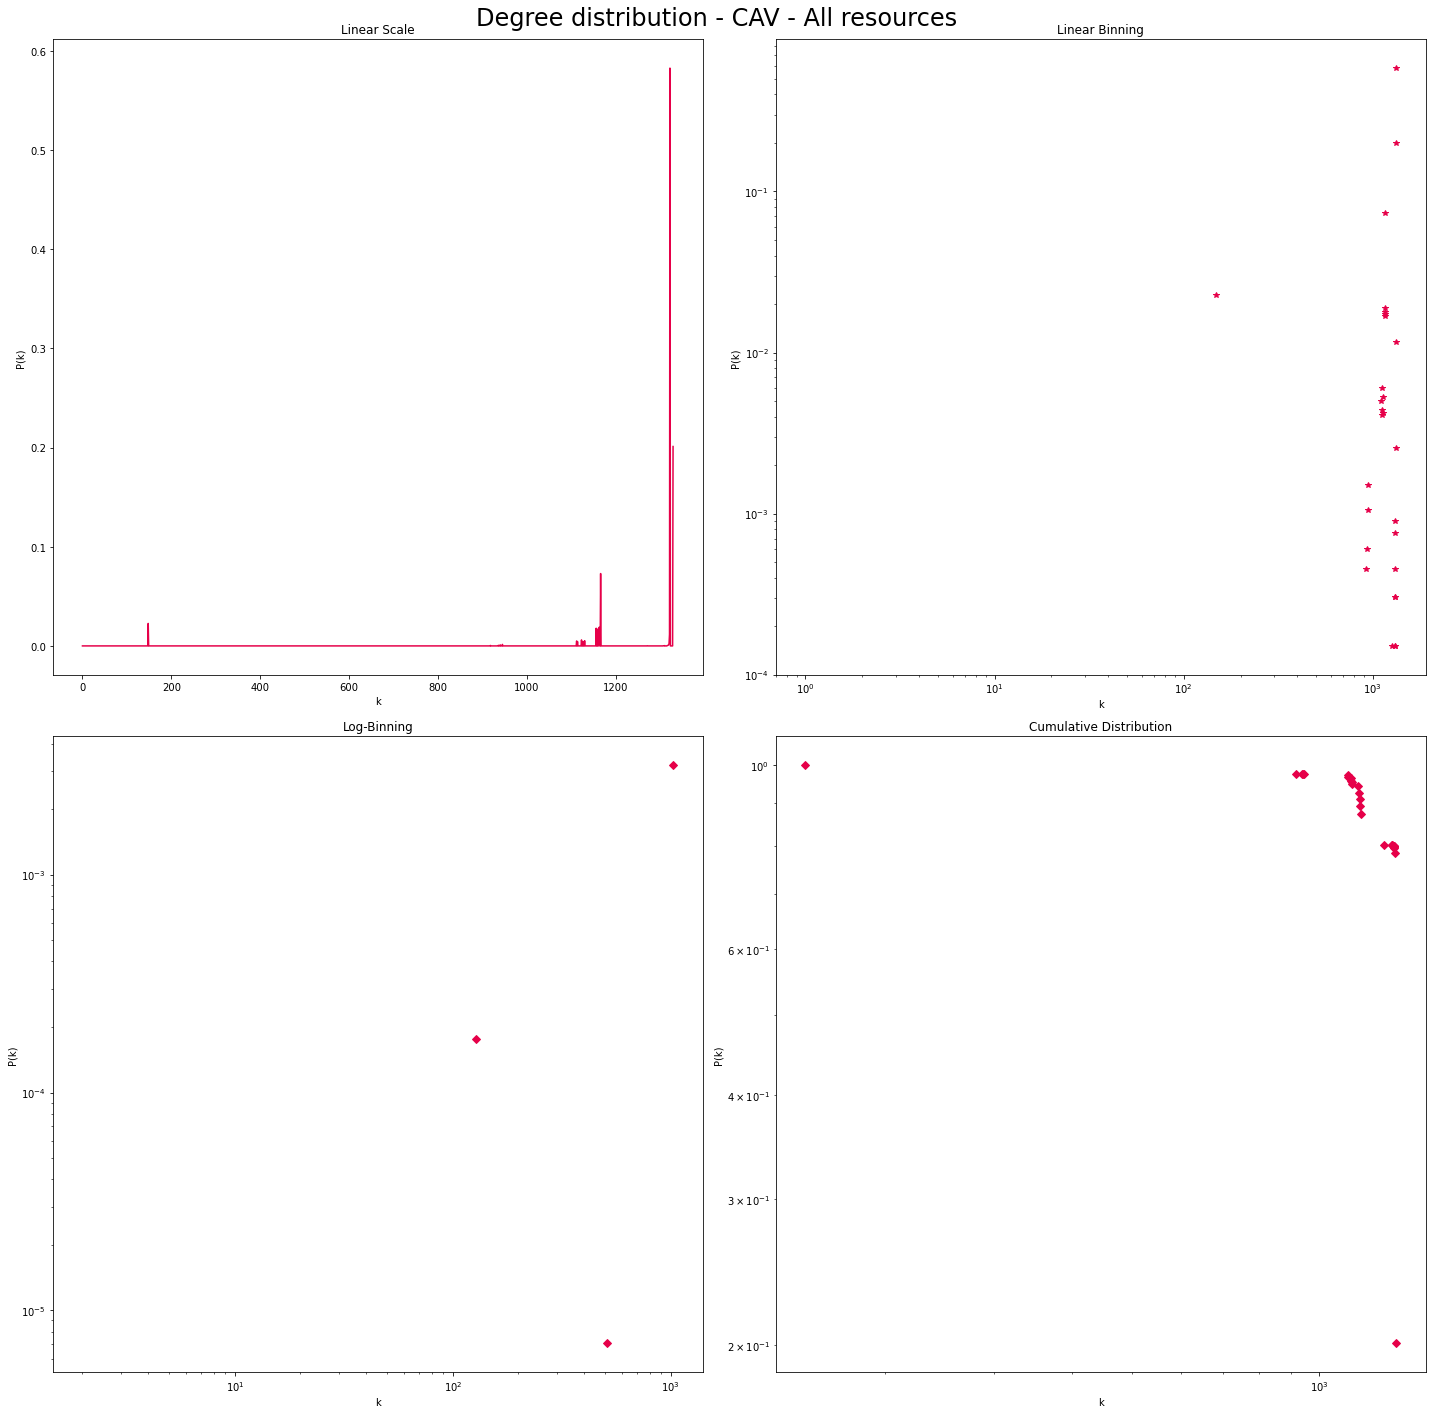

In [11]:
max_degree = max(user_network.degree())
print(max_degree)

# Colors palette CATEGORICAL
# ["#ea5545", "#f46a9b", "#ef9b20", "#edbf33", "#ede15b", "#bdcf32", "#87bc45", "#27aeef", "#b33dc6"]
# ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"] Pasteles
# [#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"] Dutch

# Colors palette Secquence
# ["#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9e52f", "#d0ee11", "#d0f400"]

# Crear una lista donde se almacena
degree_list = np.zeros(max_degree, dtype=int)

for node in user_network.vs():    
    degree_list[node.degree()-1] = (degree_list[node.degree()-1] + 1)

degree_list = degree_list / user_network.vcount()

plt.clf()
fig, axs = plt.subplots(2, 2, figsize=(20,20))

# LINEAR SCALE
axs[0, 0].set_title('Linear Scale')
axs[0, 0].plot(degree_list, color='#e60049')
axs[0, 0].set(ylabel='P(k)', xlabel='k')

# LINEAR BINNING
axs[0, 1].set_title('Linear Binning')
axs[0, 1].plot(range(max_degree), degree_list, color="#e60049", marker='*', ls='None')
axs[0, 1].loglog()
axs[0, 1].set(ylabel='P(k)', xlabel='k')

# LOG-BINNING
axs[1, 0].set_title('Log-Binning')
n_log_bin = ceil(log2(max(user_network.degree())))
x_values, y_values = calculate_log_binning(degree_list, n_log_bin)
axs[1, 0].plot(x_values, y_values, color='#e60049', marker="D", ls='None')
axs[1, 0].loglog()
axs[1, 0].set(ylabel='P(k)', xlabel='k')

# COMULATIVE
axs[1, 1].set_title("Cumulative Distribution")
degree_sequence = sorted([d for d in user_network.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(np.array(cnt)/user_network.vcount())
axs[1, 1].loglog(deg, cs, color='#e60049', marker="D", ls='None')
axs[1, 1].set(ylabel='P(k)', xlabel='k')

fig.suptitle("Degree distribution - CAV - All resources", fontsize=24)
fig.tight_layout()
plt.show()

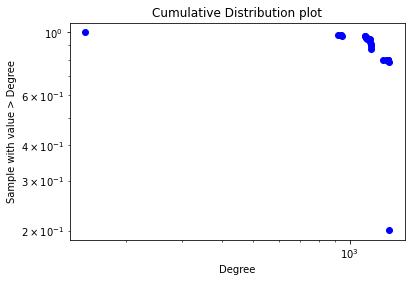

In [12]:
degree_sequence = sorted([d for d in user_network.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(np.array(cnt)/user_network.vcount())
plt.loglog(deg, cs, 'bo')
plt.title("Cumulative Distribution plot")
plt.ylabel("Sample with value > Degree")
plt.xlabel("Degree")
plt.show()

### Weighted distribution

1000


<Figure size 432x288 with 0 Axes>

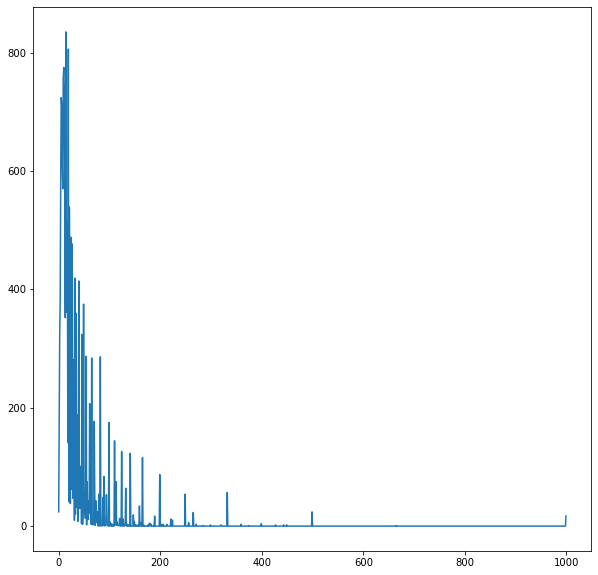

In [24]:
arreglo_test = (np.array(user_network.es['weight'])*1000).astype(int)
max_peso = max(arreglo_test)
print(max_peso)

# Crear una lista donde se almacena
arreglo_test_ = np.zeros(max_peso, dtype=int)

for node in arreglo_test:
    #print(node.degree())
    arreglo_test_[node-1] = (arreglo_test_[node-1] + 1)

plt.clf()
plt.figure(figsize=(10,10))
plt.plot(arreglo_test_)
#fit = powerlaw.Fit(np.array(degree_list)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
#fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
#fit.plot_ccdf()
#plt.yscale("log")
#plt.xscale("log")
plt.show()
print()

P6: Scale-free distribution p(k) = ∼k^{−α}.


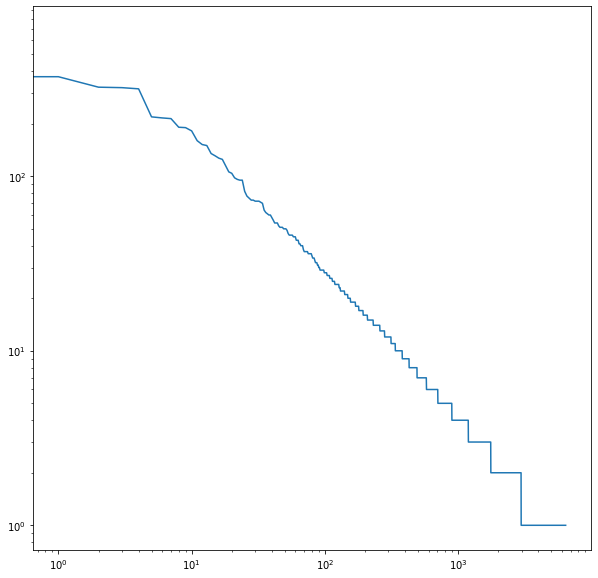

In [15]:
##### P6: Scale-free distribution p(k) = ∼k−α. #####
print("P6: Scale-free distribution p(k) = ∼k^{−α}.")
distri_grados = df_train_k_pos.RESOURCE.value_counts()
plt.figure(figsize=(10,10))
plt.plot(sorted(distri_grados,reverse=True))
#x1, y1 = [100, 700], [0.13, 0.015]
#x2, y2 = [1, 231], [3, 2]
#plt.plot(x1, y1, marker = 'o')
plt.yscale("log")
plt.xscale("log")
plt.show()
print()

In [31]:
user_network_test = user_network.copy()
user_network_test.es.select(weight_lt=0.1).delete()

In [32]:
user_network_test.summary()

'IGRAPH UNW- 1032 1326 -- \n+ attr: name (v), weight (e)'

34


Text(0, 0.5, 'P(k)')

<Figure size 432x288 with 0 Axes>

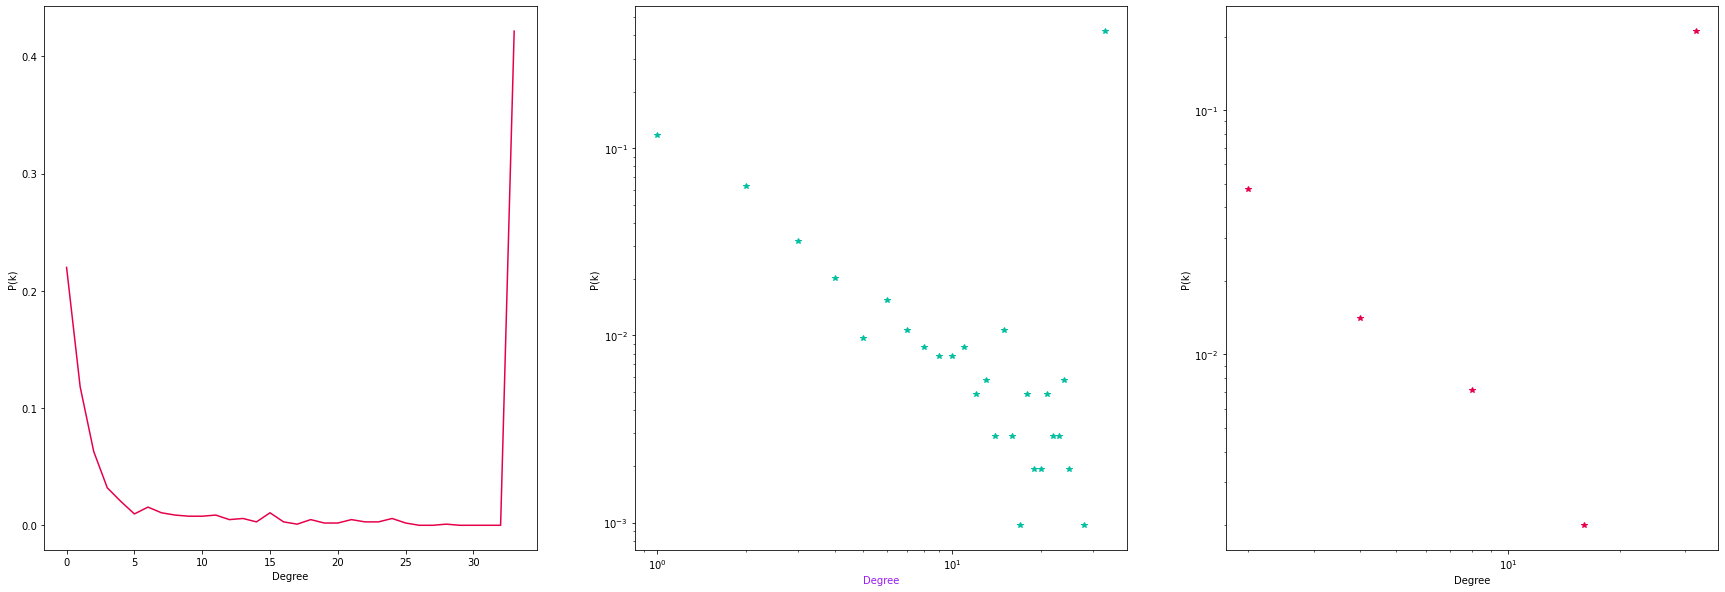

In [33]:
max_degree = max(user_network_test.degree())
print(max_degree)

# Crear una lista donde se almacena
degree_list = np.zeros(max_degree, dtype=int)

for node in user_network_test.vs():    
    degree_list[node.degree()-1] = (degree_list[node.degree()-1] + 1)

degree_list = degree_list / user_network_test.vcount()

plt.clf()
fig = plt.figure(figsize=(30, 10))     

plt.subplot(1, 3, 1)
plt.plot(degree_list, color="#e60049")
plt.xlabel('Degree')
plt.ylabel('P(k)')

plt.subplot(1, 3, 2)
plt.plot(range(max_degree), degree_list, color="#00bfa0", marker='*', ls='None')
plt.loglog()
plt.xlabel('Degree', color='#9b19f5')
plt.ylabel('P(k)')

plt.subplot(1, 3, 3)
n_log_bin = ceil(log2(max(user_network_test.degree())))
x_values, y_values = calculate_log_binning(degree_list, n_log_bin)
plt.plot(x_values, y_values, color='#e60049', marker="*", ls='None')
#C = y_values[0]
#alpha = 1.4
#x = np.arange(1,len(degree_list))
#y = C*np.power(x,-alpha)
#plt.plot(x, y, "b")
plt.loglog()
plt.xlabel('Degree')
plt.ylabel('P(k)')


In [34]:
density = user_network_test.density()
print("Density:", density)

avg_degree = sum(user_network_test.degree()) / user_network_test.vcount()
print("Avg. degree", avg_degree)

components = user_network_test.components()
print("Connected Components:", len(components))

Density: 0.002492499943608599
Avg. degree 2.5697674418604652
Connected Components: 505
